# Project 5

Weather Data Reporter

Description

The Weather Data Reporter is a beginner-level project that involves analyzing and summarizing weather data using Pandas. In this project, you'll work with a CSV file containing daily weather information like temperature, humidity, wind speed, and precipitation. The goal is to generate useful insights, such as average weather statistics, extreme weather events, and trends over time.s.

Algorithm
- Import the required libraries (Pandas, Matplotlib, Seaborn).

- Load the CSV file into a Pandas DataFrame.

- Handle missing values by:

    - Filling them with a default value.

    - Dropping rows or columns with too many missing values.

- Analyze the data:

    - Calculate average temperature, humidity, wind speed, and precipitation.

    - Identify the hottest, coldest, and wettest days.

    - Analyze seasonal or monthly trends in weather data.

- Visualize the results using charts:

    - Line plot for temperature trends over time.

    - Bar chart for average monthly precipitation.

    - Histogram for temperature distribution.
- Display the findings and visualizations.

Key Features
- Calculates average weather statistics, including temperature, humidity, wind speed, and precipitation.
- Identifies extreme weather events such as the hottest, coldest, and wettest days.
- Analyzes monthly trends in precipitation and temperature.
- Visualizes the data with line plots, bar charts, and histograms.
- Provides practical experience with weather data analysis using Pandas and visualization tools.

## Import Library

In [36]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import  Dataset

link source: https://www.kaggle.com/datasets/raidevesh05/movie-ratings-dataset

1. Dataset Description
    - This dataset contains synthetic weather data created for 10 different locations in the US, such as New York, Los Angeles, Chicago, Houston, Phoenix, Philadelphia, San Antonio, San Diego, Dallas, and San Jose.
    - Each weather parameter (temperature, humidity, precipitation, and wind speed) has 1 million data points for each location.

2. Dataset Features (Columns)
    - Location: The city where the weather data is simulated.
    - Date_Time: The date and time the weather data was recorded.
    - Temperature_C: Temperature in Celsius.
    - Humidity_pct: Humidity in percentage.
    - Precipitation_mm: Precipitation in millimetres.
    - Wind_Speed_kmh: Wind speed in kilometres per hour.

3. Dataset Characteristics
    
    Variability and Complexity:

    - This dataset reflects realistic weather patterns with seasonal variations.Example:

        - In New York, temperature and precipitation are higher during summer.

        - In Phoenix, temperatures are lower and precipitation is higher during winter.

    - Data Generation Method:

    - Data was generated using the Faker library in Python.

    - Random values were generated within realistic ranges, with adjustments for seasonal variations.

4. Potential Uses of the Dataset
    - Weather Prediction Models: The dataset can be used to develop and train weather prediction models.

    - Climate Studies: Useful for analysing weather patterns and trends in different regions.
    - Education: Suitable for learning data analysis, visualisation, and modelling in the context of weather data.


In [37]:
# import dataset
df = pd.read_csv(r'D:\File Belajar\Belajar Data\Udemy\pandas\Project\Project 5\weather_data.csv')
df.head(3)

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951


In [38]:
# Show row and column dataset
print('Row:', df.shape[0], 'Column:', df.shape[1])

Row: 1000000 Column: 6


In [39]:
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Location          1000000 non-null  object 
 1   Date_Time         1000000 non-null  object 
 2   Temperature_C     1000000 non-null  float64
 3   Humidity_pct      1000000 non-null  float64
 4   Precipitation_mm  1000000 non-null  float64
 5   Wind_Speed_kmh    1000000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 45.8+ MB


In [40]:
df.describe()

,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,14.779705,60.021830,5.109639,14.997598
std,14.482558,17.324022,2.947997,8.663556
min,-19.969311,30.000009,0.000009,0.000051
25%,2.269631,45.008500,2.580694,7.490101
50%,14.778002,60.018708,5.109917,14.993777
75%,27.270489,75.043818,7.613750,22.514110
max,39.999801,89.999977,14.971583,29.999973


The following are the key points of the descriptive analysis results of the synthetic weather dataset:

1. Temperature (Temperature_C):

    - Average: 14.78°C, with considerable variation (standard deviation 14.48°C).
    - Range: from -19.97°C (cold) to 39.99°C (hot).
    - Symmetrical distribution as the median and mean are almost equal.

2. Humidity (Humidity_pct):
    - Average: 60.02%, with a variation of 17.32%.
    - Range: from 30% to 89.99%.
    - Symmetrical distribution with the median close to the mean.

3. Precipitation_mm:
    - Average: 5.11 mm, with a variation of 2.95 mm.
    - Range: from 0 mm (no rain) to 14.97 mm (heavy rain).
    - Symmetrical distribution.

4. Wind Speed (Wind_Speed_kmh):
    - Average: 14.99 km/h, with a variation of 8.66 km/h.
    - Range: from 0 km/h (no wind) to 29.99 km/h (strong wind).
    - Symmetrical distribution.

General Conclusions:
- The data has no missing values and shows moderate variation.
- The distributions of temperature and wind speed are more variable than humidity and precipitation.


## Exploratory Data Analysis (EDA)

### Rename coloumn

In [41]:
# Ubah Nama Kolom
df.rename(columns={
    'Location':'location',
    'Date_Time':'date',
    'Temperature_C':'temp',
    'Humidity_pct':'humidity',
    'Precipitation_mm':'precipitation',
    'Wind_Speed_kmh':'wind'
}, inplace=True)
df.head()

,location,date,temp,humidity,precipitation,wind
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622


In [42]:
# Cek missing value
df.isna().sum()

location         0
date             0
temp             0
humidity         0
precipitation    0
wind             0
dtype: int64

In [43]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   location       1000000 non-null  object        
 1   date           1000000 non-null  datetime64[ns]
 2   temp           1000000 non-null  float64       
 3   humidity       1000000 non-null  float64       
 4   precipitation  1000000 non-null  float64       
 5   wind           1000000 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 45.8+ MB


### Average temperatures in USA cities

In [44]:
group_temp = df.groupby('location')
loc_temp = group_temp['temp'].agg('mean')
loc_temp.sort_values(ascending=True)

location
Phoenix         12.792479
San Diego       14.933539
Houston         14.942985
San Jose        14.956108
Dallas          15.009097
Chicago         15.009208
New York        15.013389
San Antonio     15.027761
Philadelphia    15.035892
Los Angeles     15.081063
Name: temp, dtype: float64

Analysis:
- Phoenix has the lowest average temperature, at around 12.79°C.
- San Diego, Houston, and San Jose have slightly higher average temperatures, with temperatures of around 14.93°C to 14.96°C respectively.
- Dallas, Chicago, New York, San Antonio, and Philadelphia have similar average temperatures, ranging from 15.01°C to 15.04°C.
- Los Angeles records the highest average temperature on this list, at around 15.08°C.

### Average percentage humidity in USA cities


In [45]:
group_temp = df.groupby('location')
loc_temp = group_temp['humidity'].agg('mean')
loc_temp.sort_values(ascending=False)

location
Chicago         60.088798
Los Angeles     60.072151
San Diego       60.072074
Phoenix         60.048643
Philadelphia    60.044902
New York        60.044688
San Jose        59.986630
Houston         59.967598
Dallas          59.959900
San Antonio     59.932798
Name: humidity, dtype: float64

Analysis:
- Chicago has the highest average humidity, at around 60.09%.
- Los Angeles, San Diego, and Phoenix have very similar humidity, ranging from 60.07% to 60.05%.
- Houston, Dallas, and San Antonio have slightly lower average humidity again, with values around 59.97% to 59.93%.

### Average rainfall in the city of USA


In [46]:
group_temp = df.groupby('location')
loc_temp = group_temp['precipitation'].agg('mean')
loc_temp.sort_values(ascending=True)

location
San Jose        4.987398
New York        4.993057
Dallas          4.997508
Houston         4.997757
Chicago         5.003164
Los Angeles     5.004491
San Diego       5.006593
San Antonio     5.008091
Philadelphia    5.008561
Phoenix         6.087485
Name: precipitation, dtype: float64

Analysis:
- Phoenix has the highest average rainfall, at around 6.09 mm.
- San Jose, New York, Dallas, Houston and Chicago had almost similar average rainfall, ranging from 4.99 mm to 5.00 mm.
- Philadelphia recorded a slightly higher average rainfall, at around 5.01 mm.

### Rata-rata kecepatan angin di kota USA

In [47]:
group_temp = df.groupby('location')
loc_temp = group_temp['wind'].agg('mean')
loc_temp.sort_values(ascending=False)

location
San Diego       15.037633
Los Angeles     15.035120
Dallas          15.022001
Chicago         14.999501
Philadelphia    14.990663
Houston         14.989935
New York        14.989398
Phoenix         14.983904
San Jose        14.971369
San Antonio     14.956579
Name: wind, dtype: float64

Analysis:
- San Diego has the highest average wind speed, at about 15.04 km/h.
- Los Angeles has almost the same wind speed as San Diego, at around 15.04 km/h.
- Houston, New York and Phoenix had almost identical average wind speeds, ranging from about 14.99 km/h to 14.98 km/h.
- San Jose and San Antonio recorded the lowest average wind speeds, at around 14.97 km/h and 14.96 km/h respectively.


### Hottest, coldest and highest rainfall temperatures 


In [48]:
# Cuaca terpanas
hot_temp = df.loc[df['temp'].idxmax()]
print('Cuaca Panas:\n', hot_temp)

# Cuaca dingin
cold_temp = df.loc[df['temp'].idxmin()]
print('\nCuaca Dingin:\n', cold_temp)

# Cuaca Lembab\
wet_day = df.loc[df['precipitation'].idxmax()]
print('\nCuaca lembab:\n', wet_day)

Cuaca Panas:
 location                    New York
date             2024-05-16 14:31:50
temp                       39.999801
humidity                   35.418345
precipitation               6.574819
wind                       20.988972
Name: 899115, dtype: object

Cuaca Dingin:
 location                     Phoenix
date             2024-01-12 20:20:14
temp                      -19.969311
humidity                   52.217649
precipitation               0.554449
wind                        21.77262
Name: 360894, dtype: object

Cuaca lembab:
 location                     Phoenix
date             2024-01-02 00:58:36
temp                       -0.125291
humidity                   79.288523
precipitation              14.971583
wind                       22.641603
Name: 807907, dtype: object


Information:
- Hot Weather: On 16 May 2024, in New York, temperatures reached nearly 40°C with 35% humidity. Despite the very high temperatures, the humidity was relatively low, indicating dry hot conditions. Measured precipitation was quite low (6.57mm) and winds were quite strong (20.99 km/h).

- Cold Weather: On 12 January 2024, in Phoenix, the extreme low temperature reached -19.97°C. Despite the extreme temperatures, the relative humidity (52%) and precipitation (0.55mm) were not very significant. Winds are quite strong (21.77 km/h).

- Humid Weather: On 2 January 2024, in Phoenix, the humidity reached 79%, which is very high, indicating humid air conditions. However, the temperature at that time was not very cold (-0.13°C) and despite the low temperature, precipitation was quite high (14.97mm).


### Average Percentage Humidity per month


In [49]:
df['month'] = df['date'].dt.to_period('M')
monthly_humi = df.groupby('month')['humidity'].mean()
monthly_humi

month
2024-01    60.018150
2024-02    60.070992
2024-03    59.986059
2024-04    60.011225
2024-05    60.028458
Freq: M, Name: humidity, dtype: float64

Information:
- Humidity is relatively stable: The average monthly humidity ranges from 59.99% to 60.07%, showing little variation between months.
- No significant trends: The data shows almost constant humidity, with no notable decreases or increases throughout the five-month period analysed.


### Average monthly wind speed


In [50]:
df['month'] = df['date'].dt.to_period('M')
monthly_wind = df.groupby('month')['wind'].mean()
monthly_wind

month
2024-01    14.983148
2024-02    14.998843
2024-03    15.031220
2024-04    14.986775
2024-05    14.980563
Freq: M, Name: wind, dtype: float64

Information: 
- Wind speed is stable: The average wind speed per month varied slightly between 14.98 km/h to 15.03 km/h, indicating wind stability during the period analysed.
- No significant fluctuations: The wind speed data shows consistency without any drastic changes from month to month.


## Visualisasi Data

### Visualization Bar

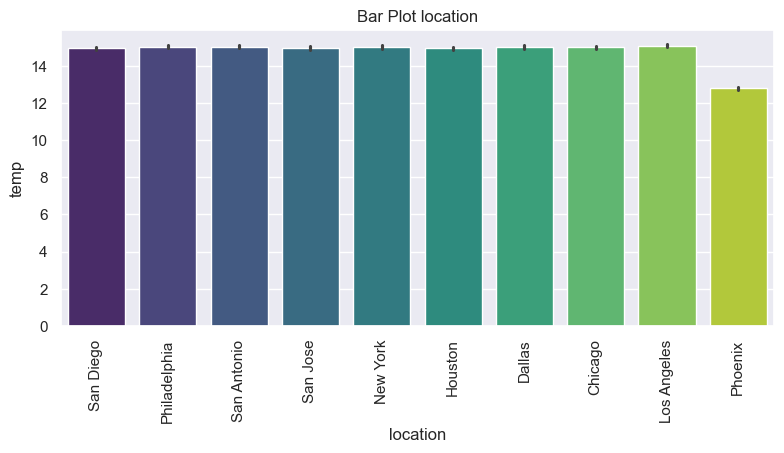

In [51]:
# Bar graph

plt.figure(figsize=(8,4)) # lebar 8, tinggi 4
sns.barplot(data=df, x='location', y='temp', palette='viridis', estimator='mean') # 
plt.title(f'Bar Plot location')
plt.xlabel('location')
plt.ylabel('temp')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

Information:
- The data distribution in each city is flat at 13 C temp, except Phonix city with an average temperature of 12 C.


### Visualization Line Chart

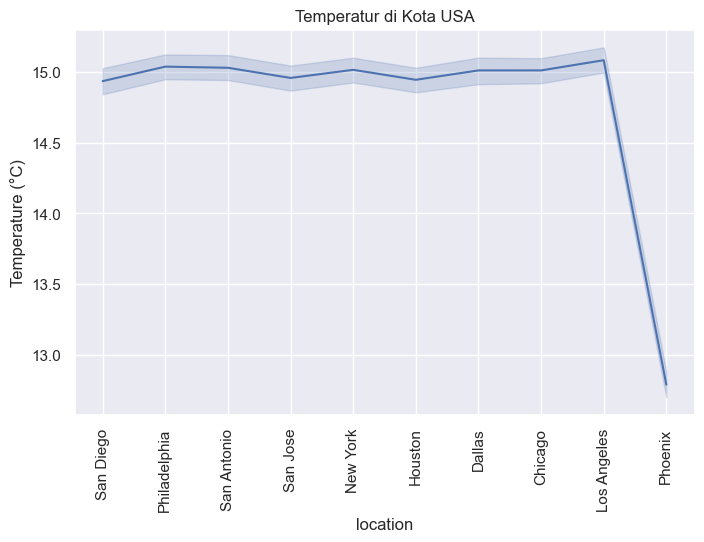

In [52]:
# Mengatur tema
sns.set_theme(style='darkgrid')

# Mengatur ukuran gambar
plt.figure(figsize=(8,5))

# Menggambar lineplot
sns.lineplot(
    data=df, 
    x='location', 
    y='temp', 
    palette='viridis', 
    estimator='mean',  # Menghitung rata-rata jika ada banyak nilai per tahun
    sort=True # Mengatur agar tahun diurutkan
    )
plt.title('Temperatur di Kota USA')
plt.xlabel('location')
plt.ylabel('Temperature (°C)')

# Memutar label x agar lebih mudah dibaca
plt.xticks(rotation=90)

plt.show()

Information:
- Temperatures were evenly distributed at 15 centigrade for 8 out of 10 cities.
- Temperatures begin to drop in the city of Los Angeles and peak in the city of Phoenix with an average temperature of 13 C.


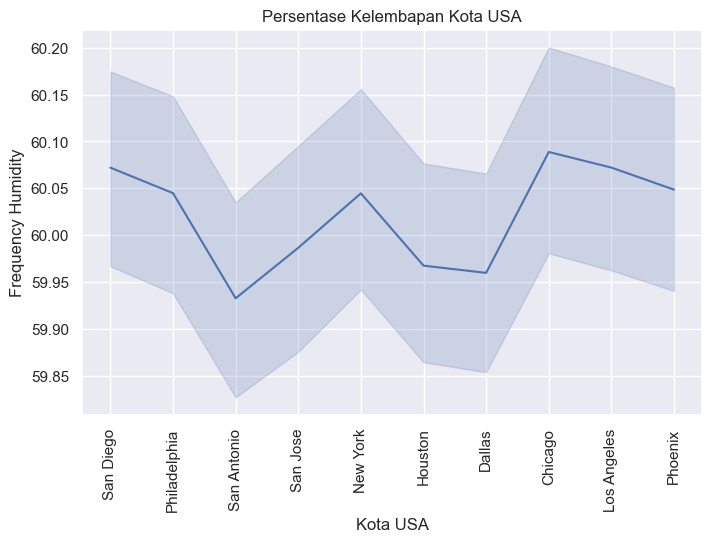

In [53]:
# Mengatur tema
sns.set_theme(style='darkgrid')

# Mengatur ukuran gambar
plt.figure(figsize=(8,5))

# Menggambar lineplot
sns.lineplot(
    data=df, 
    x='location', 
    y='humidity', 
    palette='viridis', 
    estimator='mean',  # Menghitung rata-rata jika ada banyak nilai per tahun
    sort=True # Mengatur agar tahun diurutkan
    )
plt.title('Persentase Kelembapan Kota USA')
plt.xlabel('Kota USA')
plt.ylabel('Frequency Humidity')
plt.xticks(rotation=90)
plt.show()

Information:
- The graph shows the instability of the fluctuating data for city humidity.
- The lowest point of humidity was San Anthonio with an average percentage of 59.95.
- New York City had an increase in humidity with a percentage of 60.05 and a decrease again in Houston.
- The highest point is in the city of Chicago with an average percentage of more than 60.05


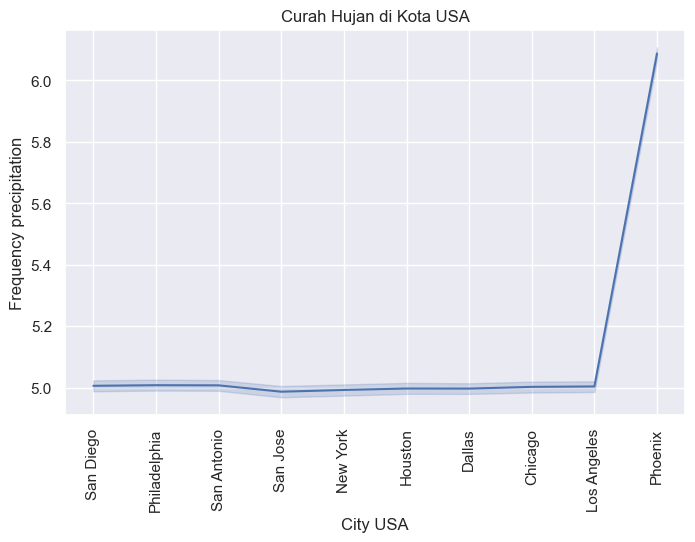

In [54]:
# Mengatur tema
sns.set_theme(style='darkgrid')

# Mengatur ukuran gambar
plt.figure(figsize=(8,5))

# Menggambar lineplot
sns.lineplot(
    data=df, 
    x='location', 
    y='precipitation', 
    palette='viridis', 
    estimator='mean',  # Menghitung rata-rata jika ada banyak nilai per tahun
    sort=True # Mengatur agar tahun diurutkan
    )
plt.title('Curah Hujan di Kota USA')
plt.xlabel('City USA')
plt.ylabel('Frequency precipitation')
plt.xticks(rotation=90)
plt.show()

Information:
- Rainfall in USA cities mostly at 5 mm
- Data is increasing for rainfall in the cities of los angeles and phoenix
- The city of Phoenix experiences very high rainfall compared to other cities.


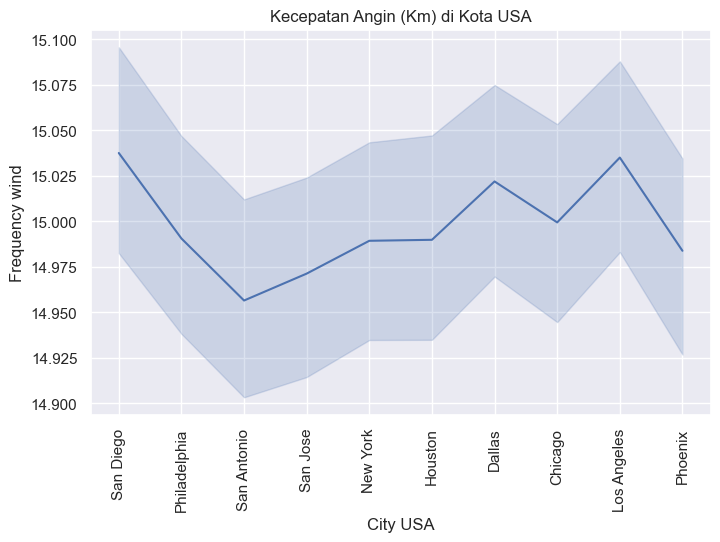

In [55]:
# Mengatur tema
sns.set_theme(style='darkgrid')

# Mengatur ukuran gambar
plt.figure(figsize=(8,5))

# Menggambar lineplot
sns.lineplot(
    data=df, 
    x='location', 
    y='wind', 
    palette='viridis', 
    estimator='mean',  # Menghitung rata-rata jika ada banyak nilai per tahun
    sort=True # Mengatur agar tahun diurutkan
    )
plt.title('Kecepatan Angin (Km) di Kota USA')
plt.xlabel('City USA')
plt.ylabel('Frequency wind')
plt.xticks(rotation=90)
plt.show()

Information:
- The wind speed graph fluctuates, starting with San Diego with the highest wind speed of 15 km.
- The lowest wind speed is in the city of San Anthonio with 14.9 km 
- The wind speed decreased again in the city of Phoenix with a speed of 14.9 km


### Histogram Visualization

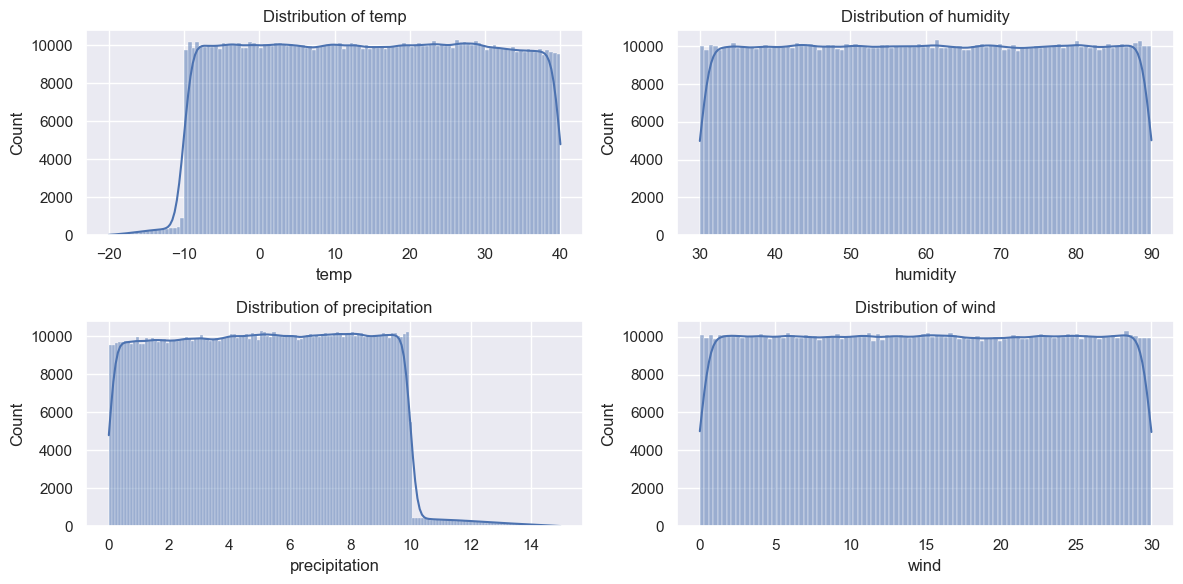

In [56]:
# mengambil data numerical 
num_col = df.select_dtypes(include=['int64','float64'])

# membuat plot visualisasi
fig, axes = plt.subplots(2,2, figsize=(12,6))

# mengubah visual dalam bentuk 2D
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], palette='viridis', multiple='stack')
    axes[i].set_title(f'Distribution of {col}', fontsize=12)

for i in range(len(num_col), 2 * 2):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

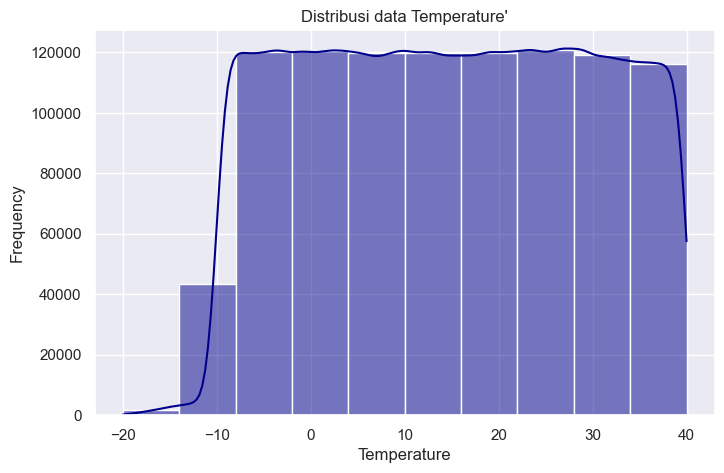

In [57]:
sns.set_theme(style='darkgrid')

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='temp', bins=10, kde=True, color='darkblue')
plt.title(f"Distribusi data Temperature'")
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

Information:
- Temperature data is fairly well distributed with a range of 0 - 40 Celsius weather temperatures.
- there are some cities that have mines and snowy weather with temperatures of -10
 


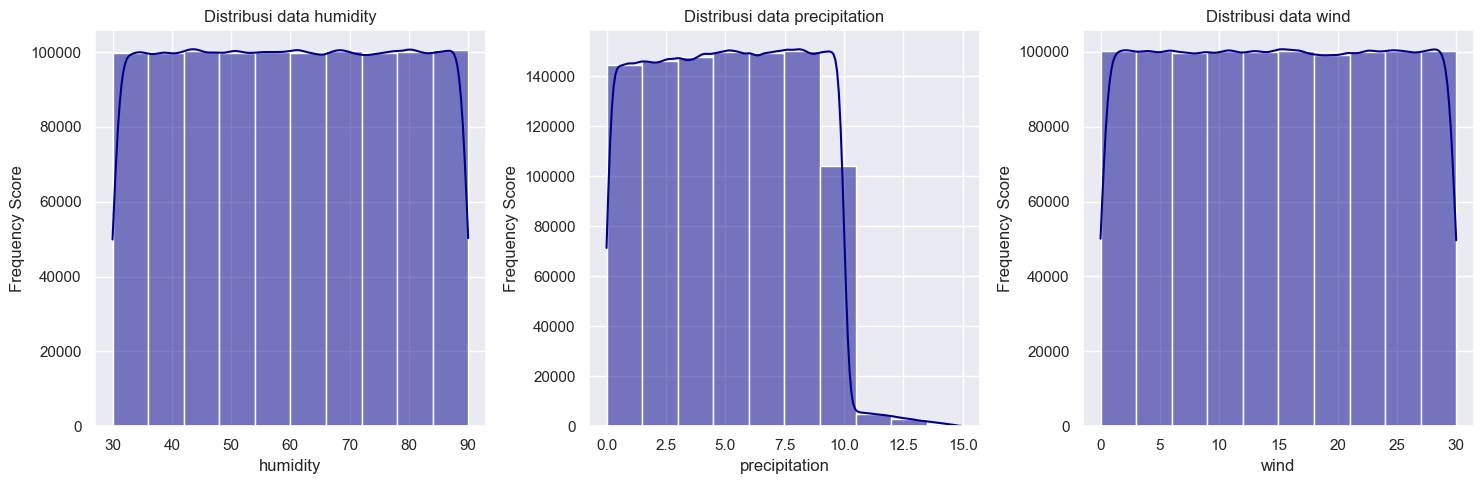

In [58]:
# Mengatur tema
sns.set_theme(style='darkgrid')

# Mempersiapkan data dan parameter
columns_to_plot = ['humidity', 'precipitation', 'wind']
titles = ["Distribusi data humidity", "Distribusi data precipitation", "Distribusi data wind"]

# Mengatur ukuran gambar
plt.figure(figsize=(15, 5))

# Loop untuk membuat subplot
for i, column in enumerate(columns_to_plot):
    plt.subplot(1, 3, i + 1)  # 1 baris, 3 kolom, subplot i+1
    sns.histplot(data=df, x=column, bins=10, kde=True, color='darkblue')
    plt.title(titles[i])  # Menetapkan judul dari array titles
    plt.xlabel(column)
    plt.ylabel('Frequency Score')

# Menampilkan plot
plt.tight_layout()  # Untuk memastikan tidak ada tumpang tindih antara subplot
plt.show()

Information:
- Data on humidity is well distributed, almost all cities in the USA experience humidity with a percentage of 30 - 90.
- The distribution of data on precipitation is less well distributed, the data is piled up in the range 0.0 - 10. Most cities get rainfall below 10 mm.  High rainfall occurs in some cities with a range of 10 - 15 mm.
- Wind data distribution is evenly distributed with a range of 0 - 30 km wind speed. 